In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM

import panel as pn ; pn.extension()
import holoviews as hv; hv.extension('bokeh')

import numpy as np
import sympy as sym

from IPython.display import display, HTML

np.random.seed(112244)
def gen_matrix(m,n):
    return np.random.randint( low=1,high=9, size=(m,n))

def pn_itikz( keep_file, width="10cm;" ):
    return (f'<img src="{keep_file}.svg" style="width:{width}">')

# 0. Problems with Docker Images

The Itikz displays obtained when running docker images may not display correctly.

Workarounds:
* Provide a `keep_file` argument in a directory you can write to, e.g.,
    * `keep_file = '../work/my_file`, <br> `keep_file = '/tmp/my_file`<br><br>
    Note that `\tmp` is linked to `tmp` in the docker image to allow jupyter access to the files,<br>
    i.e., **the file must be in the directory tree below the directory jupyter was started from**<br><br>
* The `keep_file.svg` will render correctly
    * E.g., from a code cell, you can call `HTML(pn_itikz(keep_file, sz))` where the `sz` string is an optional width
    * From a markdown cell, you can simpy display `<div src="keep_file.svg">`

# 1. Gaussian Elimination and Gauss Jordan Elimination Examples

**Remark:** GenLinAlgProblems provides a Convenience Julia wrapper to simplify the display of GE and GJ algoritms.

In [2]:
# The basic display function is ge()
nM.ge?

Signature:
nM.ge(
    matrices,
    Nrhs=0,
    formater=<class 'str'>,
    pivot_list=None,
    bg_for_entries=None,
    variable_colors=['red', 'blue'],
    pivot_text_color='red',
    ref_path_list=None,
    comment_list=None,
    variable_summary=None,
    array_names=None,
    start_index=1,
    func=None,
    fig_scale=None,
    tmp_dir='tmp',
    keep_file=None,
)
Docstring:
basic GE layout (development version):
matrices:         [ [None, A0, ... ], [E1, A1, ... ], [E2, A2, ... ], ... ]
Nrhs:             number of right hand side columns determines the placement of a partition line, if any
                  can also be a list of widths to be partioned...
pivot_list:       [ pivot_spec, pivot_spec, ... ] where pivot_spec = [grid_pos, [pivot_pos, pivot_pos, ...]]
bg_for_entries:   [ bg_spec, ...] where bg_spec = [gM,gN, [ entries ], color, pt ]
variable_colors:  [ basic_var_color, free_var_color]
ref_path_list:    [ path_spec, path_spec, ... ] where path_spec = [grid_pos, [pivot_

----------------
ge( matrices, ... ) will display a stack of matrices in a grid.
* the grid is assumed to have size $M_g \times N_g$, with grid indices starting from 0.
* The matrices in the stack must be of consistent sizes. Matrix indices also start from 0.
* the optional entries for ge generate various decorations

**Remark**
* For a single matrix, ge( [[None,A]], ...) can be simplified to ge(A, ...), is at grid position (0,1)

## 1.1 Stack of Matrices

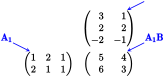

In [3]:
A = np.array([[1,2,1], [2,1,1]])
B = np.array([[3,1],[2,2],[-2,-1]])
C = A @ B

matrices = [[None, B ],                            # row 0
            [A,    C ]]                            # row 1

h,m = nM.ge( matrices, array_names = ['A', 'B'] )  # by default, names in lower levels have indices: hence A_1
h

## 1.2 Decorating a Matrix

#### **Default Formating**

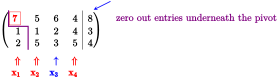

In [4]:
# Decorating a Matrix Example
# ---------------------------
A    = gen_matrix(3,5)                                               # entries are formated using str() by default
h, m = nM.ge([ [None,A] ],
             variable_summary=[True, True, False, True],             # Basic variables, Free variables
             Nrhs=1,                                                 # Number of right hand side columns
             pivot_list=[ [(0,1),[(0,0)]] ],                         # A list of pivots for each matrix
                                                                     #     of the form [ grid_indices, pivot_list]
             ref_path_list=[[0,1,[ (0,0), (1,1)],'vv']],             # path [ gM, gN, corner_list, directions ]
             comment_list=['zero out entries underneath the pivot'], # comment for each layer
             array_names=['E', ['A','b']],                           # array names for the GE/GJ stack
             keep_file = "../work/figs/f12"
            )
h
# if h does not render correctly, we can instead display the keep_file
#HTML( pn_itikz("../work/figs/f12", '12cm'))

In [6]:
# The underscore version of the function returns m,tex_file,svg_file
for i in nM._ge([ [None,A] ]):
    print(type(i))

<class 'itikz.nicematrix.MatrixGridLayout'>
<class 'pathlib.WindowsPath'>
<class 'pathlib.WindowsPath'>


#### **Symbols**

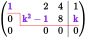

In [8]:
k  = sym.Symbol('k')
Ab = sym.Matrix([[1,2,4,1],[0,k**2-1,8,k],[0,0,0,0]])

# we can apply functions to the latex tex_file prior to rendering to SVG
def decorate(m):
    m.decorate_tex_entries( 0, 1, nM.make_decorator( bf=True, text_color="BlueViolet" ), # use svg color names by default
                                                    [ (0,0), (1,1), (1,3)] )             # apply the decorater to entries in matrix (0,1)

h, m = nM.ge( Ab,
              formater         = sym.latex,                           # Function that produces a string representation of a matrix entry 
              Nrhs             = 1,                                   # Number of right hand side columns
              ref_path_list    = [[0,1,[ (0,0), (1,1)],'hh', 'red']], # path [ gM, gN, corner_list, directions, color ]
              func             = decorate,
              keep_file        = "../work/figs/f12sym"
            )
h
# if h does not render correctly, we can instead display the keep_file
#HTML( pn_itikz("../work/figs/f12sym", '4cm'))

In [9]:
# sometimes, we may need to clear out temporary files...
!rm -rf ../work/* /tmp/itikz/* ../tmp/keep/* tmp/*

## 1.3 Gaussian Elimination Example

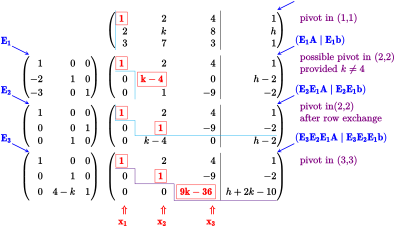

In [10]:
# GE problem with Symbolic Matrix entries: we need to specify the sym.latex formater

k  = sym.Symbol('k'); h = sym.Symbol('h')
Ab = sym.Matrix([[1,2,4,1],[2,k,8,h],[3,7,3,1]]); matrices = [[None, Ab]]; pivots = []; txt=[]

E1 = sym.eye(3);E1[1:,0]=[-2,-3]; A1=E1*Ab;                               matrices.append([E1,A1]); pivots.append((1,1));txt.append('Pivot at (1,1)')
E2 = sym.eye(3);E2=E2.elementary_row_op('n<->m',row1=1,row2=2); A2=E2*A1; matrices.append([E2,A2]); pivots.append(None); txt.append('Rows 2 <-> 3')
E3 = sym.eye(3);E3[2,1]=4-k; A3=E3*A2;                                    matrices.append([E3,A3]); pivots.append((2,2));txt.append('Pivot at (2,2)')
pivots.append((3,3)); txt.append('In Row Echelon Form')


h,m = nM.ge( matrices, Nrhs=[1],
             formater = sym.latex,
             pivot_list=[ [(0,1), [(0,0)] ],
                          [(1,1), [(0,0),(1,1)]],
                          [(2,1), [(0,0),(1,1)]],
                          [(3,1), [(0,0),(1,1),(2,2)]]
                          ],
             ref_path_list = [ [0,1, [(0,0)            ],'vv','cyan'],
                               [1,1, [(0,0),(1,1)      ],'hv','cyan'],
                               [2,1, [(0,0),(1,1)      ],'vh','cyan'],
                               [3,1, [(0,0),(1,1),(2,2)],'hh','Indigo']
                             ],
             comment_list = ["pivot in (1,1)",
                             r"possible pivot in (2,2) \\ \qquad provided $k \ne 4$",
                             r"pivot in(2,2)\\ \qquad after row exchange",
                             "pivot in (3,3)"],
             variable_summary = [True,True,True],
             array_names = ['E', ['A', 'b']],
             tmp_dir="/tmp/itikz", keep_file="../tmp/work/m3"    # specify the temp directory and a location to save the generated files
)
h
#HTML( pn_itikz("../tmp/work/m3"))

## 1.4 Lower Code Level

For more control, the lower level API can be accessed directly.<br>
$\quad$ One might look at the implementation of `nM.ge()` as an example

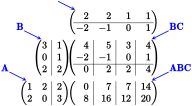

In [11]:
A = np.array( [[1,2,2],[2,0,3]])
B = np.array( [[3,1],[0,1],[2,2]])
C = np.array( [[2,2,1,1],[-2,-1,0,1]])
AB  = A @ B
ABC = AB @ C

matrices=[[None,C],[B, B@C], [A,ABC]]
m_td = nM.MatrixGridLayout(matrices, extra_cols=1, extra_rows=2)
m_td.array_format_string_list( spacer_string=r'@{\hspace{5mm}}',
                            last_col_format=r'l@{\hspace{2cm}}' )
m_td.array_of_tex_entries()

dec = nM.make_decorator(bf=True, delim='$')
m_td.nm_submatrix_locs( 'PROD', color='blue', name_specs=[
            [(0,1), 'al', dec('C')],
            # ----------------------
            [(1,0), 'al', dec('B')],
            [(1,1), 'ar', dec('B C')],
            [(2,0), 'al', dec('A')],
            [(2,1), 'ar', dec('A B C')],
        ] ,
        line_specs = [
            [(0,1), 1, None],
            [(1,0), None, 1], [(1,1), 2,[1,2,3]],
            [(2,0), None, 2], [(2,1),None,[1,2,3]]
        ]
        )
m_td.tex_repr(blockseps = r'[2mm]')

m_td_code = m_td.nm_latexdoc()

h = itikz.fetch_or_compile_svg(
    m_td_code, prefix='m_td_', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
    nexec=1, keep_file="../work/keep/stack_of_matrices" )
h
#HTML( pn_itikz("../work/keep/stack_of_matrices", "6cm"))

# 2. QR Examples

## 2.1 Sympy Format Example

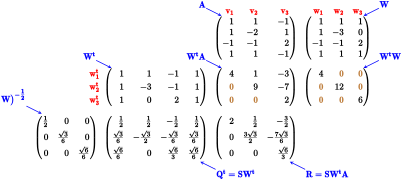

In [12]:
A = np.array([[ 1,  1, -1],
                [ 1, -2,  1],
                [-1, -1,  2],
                [ 1,  1, -1]])
W = np.array([[ 1,  1,  1],
                [ 1, -3,  0],
                [-1, -1,  2],
                [ 1,  1,  1]])

matrices =  nM.compute_qr_matrices(A,W)
# this yields an array of arrays of sympy matrices
#              [ None,   None,  A,    W ],
#              [ None,   W.T, WtA,  WtW ],
#              [ S,       Qt,   R, None ] ]

h,m = nM.qr( matrices, formater=sym.latex , fig_scale=0.9, keep_file="../work/keep/qr")
h
#HTML( pn_itikz("../work/keep/qr", "15cm"))

## 2.2 Floating Point Format Example

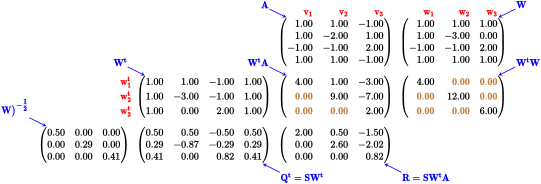

In [13]:
A = np.array([[ 1,  1, -1],
                [ 1, -2,  1],
                [-1, -1,  2],
                [ 1,  1, -1]])
W = np.array([[ 1,  1,  1],
                [ 1, -3,  0],
                [-1, -1,  2],
                [ 1,  1,  1]])

matrices = nM.compute_qr_matrices(A,W)

h,m      = nM.qr( matrices, formater=lambda a: f'{float(a):.2f}', keep_file='../work/keep/qr_num')
h
#HTML( pn_itikz("../work/keep/qr_num", "15cm"))

# 3. Eigenproblem Tables

<div style="width:50%;">
Three different tables are provided:

| case | decomposition           | comment |
| ---- | :------------           | :------ |
| 'S'  | $$A = S \Lambda S^{-1}\quad$$  | basic table |
| 'Q'  | $A = Q \Lambda Q^t$     |  spectral theorem table |
| $$\text{'SVD'}\quad$$ | $A = U \Sigma V^t$     | SVD decomposition table |

The table entries are defined in a dictionary.
</div>

## 3.1 Basic Eigenproblem Table

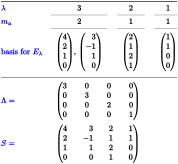

In [14]:
eig = {
    'lambda': [3,           2, 1],                                   # eigenvalues
    'ma':     [2,           1, 1],                                   # algebraic multiplicity
    'evecs':  [[sym.Matrix([4, 2, 1,0]), sym.Matrix([3, -1, 1,0])],  # eigenvalue bases (list for each eigenvalue)
               [sym.Matrix([2, 1, 2,1])],
               [sym.Matrix([1, 1, 0,0])]],
}

E       = nM.EigenProblemTable( eig, formater=sym.latex )            # object representation of the table
ep_code = E.nm_latex_doc(case='S', formater=str,
                         mmS=7, mmLambda=8, fig_scale=0.8)           # latex document for the table, extra spacing for S and Lambda columns

h = itikz.fetch_or_compile_svg( ep_code,                             # generate SVG representation for display
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        keep_file='../work/s_table'
        )
h
#HTML( pn_itikz("../work/s_table", "6cm"))

## 3.2 Spectral Theorem Table

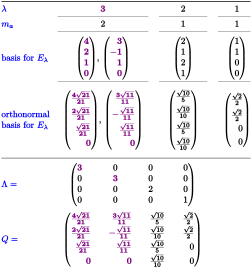

In [15]:
eig = {
    'lambda': [3,           2, 1],
    'ma':     [2,           1, 1],
    'evecs':  [[sym.Matrix([4, 2, 1,0]), sym.Matrix([3, -1, 1,0])],
               [sym.Matrix([2, 1, 2,1])],
               [sym.Matrix([1, 1, 0,0])]],
    'qvecs':  [[sym.Matrix([4, 2, 1,0])/sym.sqrt(21), sym.Matrix([3, -1, 1,0])/sym.sqrt(11)],
               [sym.Matrix([2, 1, 2,1])/sym.sqrt(10)],
               [sym.Matrix([1, 1, 0,0])/sym.sqrt(2)]]
}

E = nM.EigenProblemTable( eig, formater=sym.latex )

dec = nM.make_decorator(text_color='Purple', bf=True)            # decorate some entries of the matrices
E.decorate_values(E.eig['lambda'],dec,0)
E.decorate_matrix(E.eig['evecs'][0][0], dec)
E.decorate_matrix(E.eig['evecs'][0][1], dec, col=0)
E.decorate_matrix(E.eig['qvecs'][0][0], dec)
E.decorate_matrix(E.eig['qvecs'][0][1], dec)

ep_code = E.nm_latex_doc(case='Q', formater=str, mmS=7, mmLambda=12, fig_scale=0.9)

h = itikz.fetch_or_compile_svg( ep_code,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        keep_file="../work/q_table" )
h
#HTML( pn_itikz("../work/q_table", "7cm"))

## 3.3 SVD Table

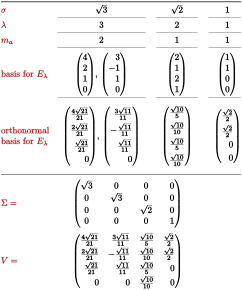

In [16]:
eig = {
    'lambda': [3,           2, 1],
    'ma':     [2,           1, 1],
    'sigma':  [sym.sqrt(3), sym.sqrt(2), 1],
    'evecs':  [[sym.Matrix([4, 2, 1,0]), sym.Matrix([3, -1, 1,0])],
               [sym.Matrix([2, 1, 2,1])],
               [sym.Matrix([1, 1, 0,0])]],
    'qvecs':  [[sym.Matrix([4, 2, 1,0])/sym.sqrt(21), sym.Matrix([3, -1, 1,0])/sym.sqrt(11)],
               [sym.Matrix([2, 1, 2,1])/sym.sqrt(10)],
               [sym.Matrix([1, 1, 0,0])/sym.sqrt(2)]]
}

E = nM.EigenProblemTable( eig, formater=sym.latex )
ep_code = E.nm_latex_doc(case='SVD', formater=str, mmS=0, mmLambda=7, fig_scale=0.9, color='FireBrick')

h = itikz.fetch_or_compile_svg(
        ep_code,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        debug=False, working_dir="/tmp/itikz", keep_file="../work/svd_table" )
h
#HTML( pn_itikz("../work/svd_table", "8cm"))